In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam,SGD
import os

In [2]:
Datadir="C:/Users/prasa/Desktop/trainingSet/0"
items = os.listdir("C:/Users/prasa/Desktop/trainingSet/0")
print (items)

['img_1.jpg', 'img_10007.jpg', 'img_10010.jpg', 'img_10017.jpg', 'img_10032.jpg', 'img_10039.jpg', 'img_10043.jpg', 'img_10059.jpg', 'img_10074.jpg', 'img_10082.jpg', 'img_10084.jpg', 'img_10095.jpg', 'img_10096.jpg', 'img_10098.jpg', 'img_10123.jpg', 'img_10124.jpg', 'img_10136.jpg', 'img_10146.jpg', 'img_10155.jpg', 'img_10156.jpg', 'img_10203.jpg', 'img_10207.jpg', 'img_10217.jpg', 'img_10220.jpg', 'img_10226.jpg', 'img_10231.jpg', 'img_10235.jpg', 'img_10242.jpg', 'img_10257.jpg', 'img_10278.jpg', 'img_10282.jpg', 'img_10284.jpg', 'img_1029.jpg', 'img_10291.jpg', 'img_10329.jpg', 'img_10332.jpg', 'img_10349.jpg', 'img_10371.jpg', 'img_10378.jpg', 'img_10401.jpg', 'img_10416.jpg', 'img_10438.jpg', 'img_1046.jpg', 'img_10463.jpg', 'img_10468.jpg', 'img_1047.jpg', 'img_10477.jpg', 'img_10483.jpg', 'img_10489.jpg', 'img_10524.jpg', 'img_10551.jpg', 'img_10616.jpg', 'img_10621.jpg', 'img_10649.jpg', 'img_10653.jpg', 'img_10672.jpg', 'img_10701.jpg', 'img_10708.jpg', 'img_10740.jpg', 'im

In [3]:
import os
import cv2
training_data=[]
img_size=28
for img in items:
    if img.endswith('.jpg'):
        full_path = os.path.join("C:/Users/prasa/Desktop/trainingSet/0",img)
        img_array=cv2.imread(full_path)
        img_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        #print(img_array)
        print(img)
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,1])
    
  
    

img_1.jpg
img_10007.jpg
img_10010.jpg
img_10017.jpg
img_10032.jpg
img_10039.jpg
img_10043.jpg
img_10059.jpg
img_10074.jpg
img_10082.jpg
img_10084.jpg
img_10095.jpg
img_10096.jpg
img_10098.jpg
img_10123.jpg
img_10124.jpg
img_10136.jpg
img_10146.jpg
img_10155.jpg
img_10156.jpg
img_10203.jpg
img_10207.jpg
img_10217.jpg
img_10220.jpg
img_10226.jpg
img_10231.jpg
img_10235.jpg
img_10242.jpg
img_10257.jpg
img_10278.jpg
img_10282.jpg
img_10284.jpg
img_1029.jpg
img_10291.jpg
img_10329.jpg
img_10332.jpg
img_10349.jpg
img_10371.jpg
img_10378.jpg
img_10401.jpg
img_10416.jpg
img_10438.jpg
img_1046.jpg
img_10463.jpg
img_10468.jpg
img_1047.jpg
img_10477.jpg
img_10483.jpg
img_10489.jpg
img_10524.jpg
img_10551.jpg
img_10616.jpg
img_10621.jpg
img_10649.jpg
img_10653.jpg
img_10672.jpg
img_10701.jpg
img_10708.jpg
img_10740.jpg
img_10741.jpg
img_10743.jpg
img_10752.jpg
img_1076.jpg
img_10773.jpg
img_10774.jpg
img_10788.jpg
img_108.jpg
img_10808.jpg
img_10809.jpg
img_10815.jpg
img_10838.jpg
img_10845.jpg
im

In [4]:

#create_training_data()

In [5]:
X=[]
Y=[]
for features,labels in training_data:
    X.append(features)
    Y.append(labels)


In [6]:
X=np.array(X).reshape(-1,img_size,img_size,3)

In [7]:
image_shape = (28, 28, 3)
latent_dimensions = 100

In [8]:
X.shape

(4132, 28, 28, 3)

In [9]:
def build_generator():
        model = Sequential()
        model.add(Dense(128 * 7 * 7, activation="relu",input_dim=latent_dimensions))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.78))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.78))
        model.add(Activation("relu"))
        model.add(Conv2D(3, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))
        noise = Input(shape=(latent_dimensions,))
        image = model(noise)
        
        return Model(noise, image)

In [10]:
def build_discriminator():
        model = Sequential()
        model.add(Conv2D(32, kernel_size=3, strides=2,input_shape=image_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.82))
        model.add(LeakyReLU(alpha=0.25))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.82))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.25))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        image = Input(shape=image_shape)
        validity = model(image)
        return Model(image, validity)


In [11]:
def display_images():
        r, c = 4,4
        noise = np.random.normal(0, 1, (r * c,latent_dimensions))
        generated_images = generator.predict(noise)
        generated_images = 0.5 * generated_images + 0.5
        fig, axs = plt.subplots(r, c)
        count = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(generated_images[count, :,:,])
                axs[i,j].axis('off')
                count += 1
        plt.show()
        plt.close()

In [12]:
X.shape

(4132, 28, 28, 3)

In [13]:

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(0.0002,0.5),
                    metrics=['accuracy'])
discriminator.trainable = False
generator = build_generator()
z = Input(shape=(latent_dimensions,))
image = generator(z)
valid = discriminator(image)

combined_network = Model(z, valid)
combined_network.compile(loss='binary_crossentropy',
                         optimizer=Adam(0.0002,0.5))

1/1 [==============================] - 0s 90ms/step


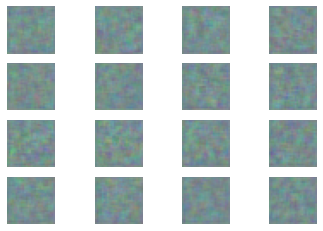

1/1 [==============================] - 0s 58ms/step


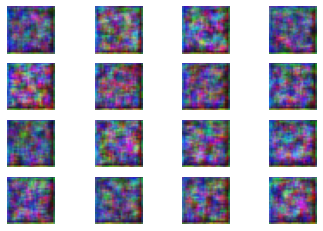

1/1 [==============================] - 0s 34ms/step


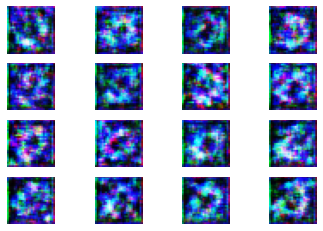

1/1 [==============================] - 0s 35ms/step


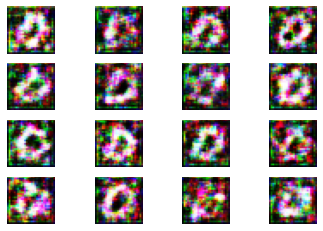

1/1 [==============================] - 0s 31ms/step


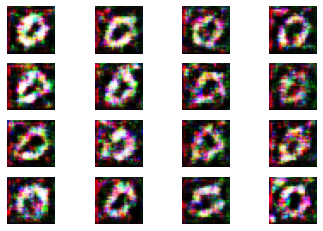

1/1 [==============================] - 0s 40ms/step


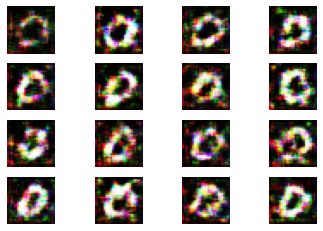

1/1 [==============================] - 0s 34ms/step


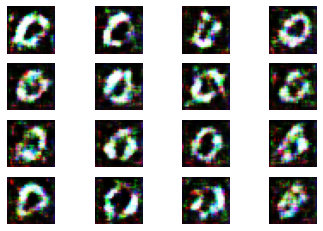

1/1 [==============================] - 0s 31ms/step


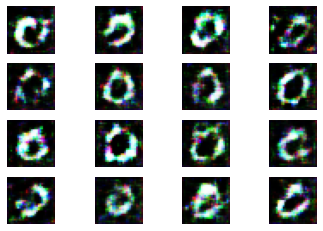

1/1 [==============================] - 0s 35ms/step


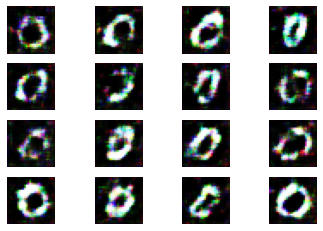

1/1 [==============================] - 0s 39ms/step


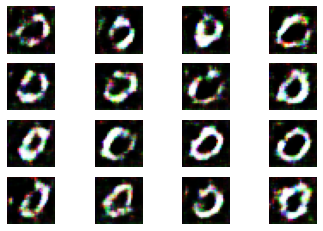

1/1 [==============================] - 0s 29ms/step


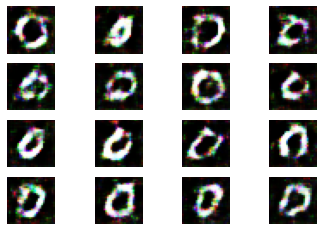

1/1 [==============================] - 0s 30ms/step


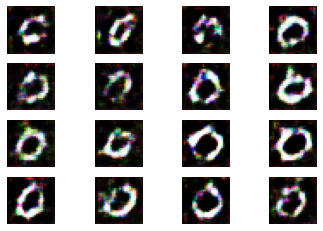

1/1 [==============================] - 0s 36ms/step


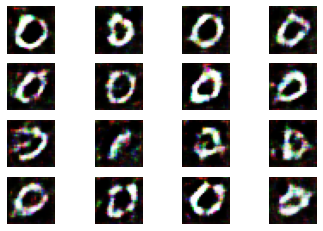

1/1 [==============================] - 0s 28ms/step


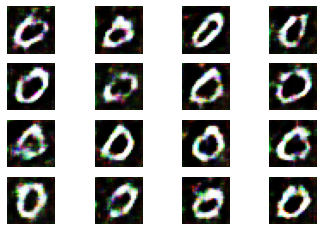

1/1 [==============================] - 0s 35ms/step


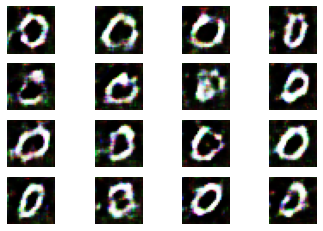

1/1 [==============================] - 0s 33ms/step


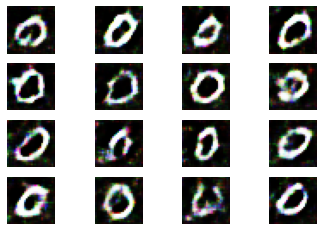

1/1 [==============================] - 0s 32ms/step


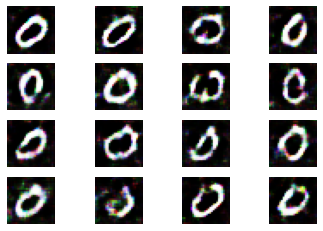

1/1 [==============================] - 0s 30ms/step


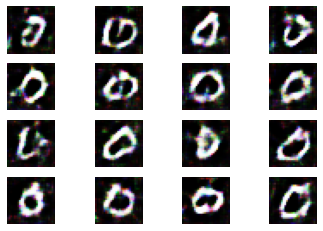

1/1 [==============================] - 0s 33ms/step


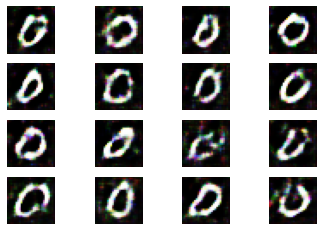

1/1 [==============================] - 0s 40ms/step


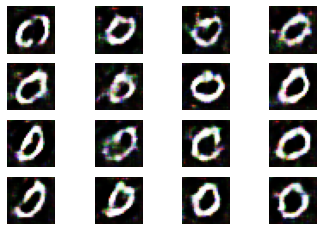

1/1 [==============================] - 0s 34ms/step


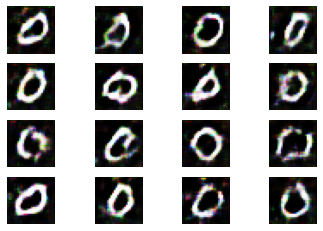

1/1 [==============================] - 0s 36ms/step


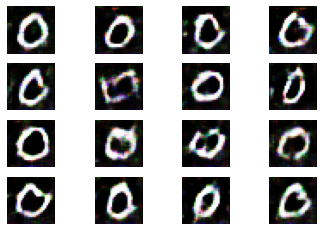

1/1 [==============================] - 0s 34ms/step


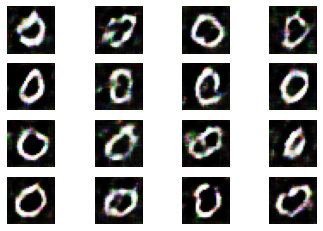

1/1 [==============================] - 0s 24ms/step


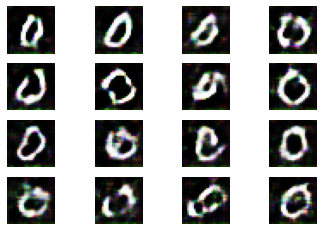

1/1 [==============================] - 0s 31ms/step


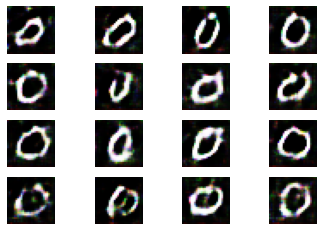

1/1 [==============================] - 0s 30ms/step


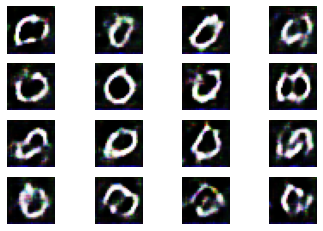

1/1 [==============================] - 0s 39ms/step


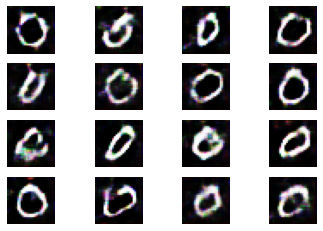

1/1 [==============================] - 0s 32ms/step


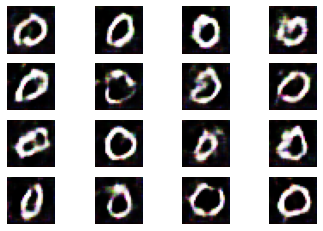

1/1 [==============================] - 0s 33ms/step


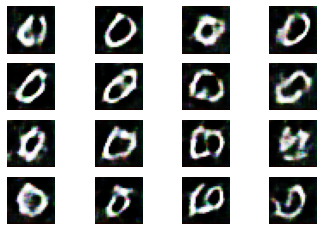

1/1 [==============================] - 0s 41ms/step


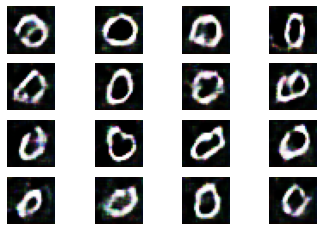

19/19 [==============================] - 1s 40ms/step


In [14]:
num_epochs=300
batch_size=600
display_interval=10
losses=[]
  
#Normalizing the input
X = (X / 127.5) - 1.
          
  
#Defining the Adversarial ground truths
valid = np.ones((batch_size, 1))
  
#Adding some noise 
valid -= 0.05 * np.random.random(valid.shape)
fake = np.zeros((batch_size, 1))
fake += 0.05 * np.random.random(fake.shape)
  
for epoch in range(num_epochs):
              
            #Training the Discriminator
              
            #Sampling a random half of images
            index = np.random.randint(0, X.shape[0], 600)
            images = X[index]
  
            #Sampling noise and generating a batch of new images
            noise = np.random.normal(0, 1, (batch_size, latent_dimensions))
            generated_images = generator.predict(noise)
              
  
            #Training the discriminator to detect more accurately
            #whether a generated image is real or fake
            discm_loss_real = discriminator.train_on_batch(images, valid)
            discm_loss_fake = discriminator.train_on_batch(generated_images, fake)
            discm_loss = 0.5 * np.add(discm_loss_real, discm_loss_fake)
              
            #Training the Generator
  
            #Training the generator to generate images
            #which pass the authenticity test
            genr_loss = combined_network.train_on_batch(noise, valid)
              
            #Tracking the progress                
            if epoch % display_interval == 0:
                 display_images()

1/1 [==============================] - 0s 18ms/step


array([[[20, 11,  2],
        [ 7,  2,  1],
        [ 2,  2,  1],
        ...,
        [ 9,  2,  2],
        [ 7,  4,  5],
        [ 2,  6, 15]],

       [[ 1,  2,  5],
        [ 0,  1,  6],
        [ 0,  2,  2],
        ...,
        [ 3,  0,  6],
        [11,  1,  4],
        [ 2,  2,  8]],

       [[ 0,  0,  1],
        [ 0,  0,  1],
        [ 0,  1,  1],
        ...,
        [ 2,  5,  4],
        [ 6,  7,  7],
        [ 1,  2,  7]],

       ...,

       [[ 1,  1,  4],
        [ 1,  0,  7],
        [ 0,  0,  0],
        ...,
        [11,  6,  3],
        [26,  6,  8],
        [ 9, 15, 41]],

       [[ 0,  0,  1],
        [ 0,  0,  2],
        [ 0,  1,  0],
        ...,
        [ 6,  6,  3],
        [ 8,  9, 12],
        [ 7, 13, 23]],

       [[ 6,  2,  2],
        [ 2,  0,  1],
        [ 3,  1,  0],
        ...,
        [20,  2,  1],
        [23,  5,  1],
        [16, 19,  8]]])

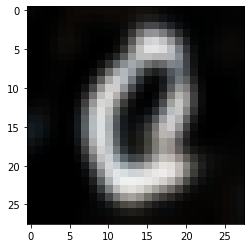

In [27]:
noise = np.random.normal(0, 1, (1,latent_dimensions))
generated_images = generator.predict(noise)
generated_images = 0.5 * generated_images + 0.5
A=(generated_images[0])
A=A*255
A=A.astype(int)
#A=cv2.threshold(A, 127, 255, cv2.THRESH_BINARY)
display(A)
import scipy
from scipy.ndimage import gaussian_filter
A=gaussian_filter(A, sigma=1)
plt.imshow(A)

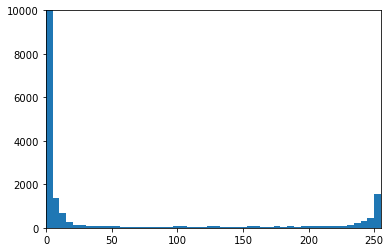

In [64]:
m=[]
n=[]
for features,labels in training_data:
    m.append(features)
    n.append(labels)
m=np.array(m).reshape(-1,img_size,img_size,3)
vals=[]
for i in range(30):
    h=m[i].mean(axis=2).flatten()
    h=h.tolist()
    for j in range(len(h)):
        vals.append(h[j])
b, bins, patches = plt.hist(vals, 50)
plt.xlim([0,255])
plt.ylim([0,10000])
plt.show()

1/1 [==============================] - 0s 61ms/step


(30, 28, 28, 3)

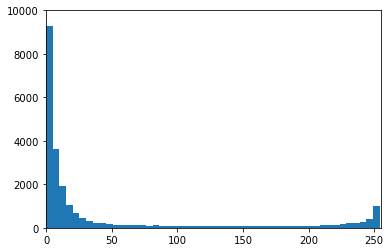

In [65]:
noise = np.random.normal(0, 1, (30,latent_dimensions))
generated_images = generator.predict(noise)
generated_images = 0.5 * generated_images + 0.5
B=(generated_images)
display(B.shape)
B=B*255
B=B.astype(int)
#B=np.array(B).reshape(-1,img_size,img_size,3)
vals1=[]
for i in range(B.shape[0]):
    h=B[i].mean(axis=2).flatten()
    h=h.tolist()
    for j in range(len(h)):
        vals1.append(h[j])
b, bins, patches = plt.hist(vals1, 50)
plt.xlim([0,255])
plt.ylim([0,10000])
plt.show()
#A=cv2.threshold(A, 127, 255, cv2.THRESH_BINARY)
#display(A)
#import scipy
#from scipy.ndimage import gaussian_filter
#A=gaussian_filter(A, sigma=1)
#plt.imshow(A)

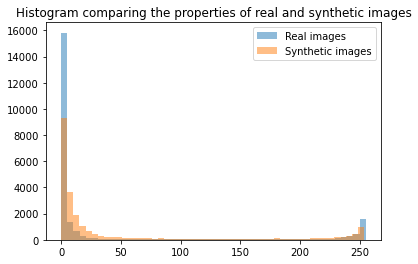

In [69]:
plt.hist(vals, 50,alpha=0.5, label='Real images')
plt.hist(vals1,50, alpha=0.5, label='Synthetic images')
plt.title('Histogram comparing the properties of real and synthetic images')
plt.legend(loc='upper right')
plt.show()

In [79]:
import skimage.measure    
entropy = skimage.measure.shannon_entropy(m[3])
entropy1 = skimage.measure.shannon_entropy(B[3])
display(entropy)
display(entropy1)

3.6203231583188065

5.056721096197885